In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\singhegm\Downloads\Position Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.shape

(10, 3)

In [4]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2].values

In [6]:
Y = Y.reshape(-1,1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [8]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

SVR()

In [9]:
# Predicting a new result with the Polynomial Regression 
import numpy as np

Y_Pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([6.5]).reshape(-1,1))))

In [10]:
print("The predicted salary is: ", Y_Pred[0])

The predicted salary is:  170370.02040650236


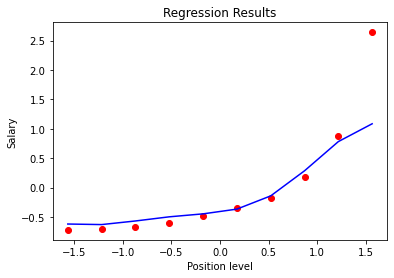

In [11]:
# Visualising the Regression results
from matplotlib import pyplot as plt

plt.scatter(X,Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Regression Results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()